In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

from transparent_background import Remover

from IPython.display import clear_output
clear_output()

In [2]:
DATA_DIR = os.path.join('..', '.data', 'fics-pcb')
PROCESSED_DIR = os.path.join('..', 'data', 'cropped_pcbs')
MANUAL_INSPECTION_DIR = os.path.join('..', 'data', 'manual_inspection')

In [3]:
images = [f for f in os.listdir(DATA_DIR) if f.endswith('.tif')]
print(f'Found {len(images)} images in {DATA_DIR}')

Found 27 images in ../.data/fics-pcb


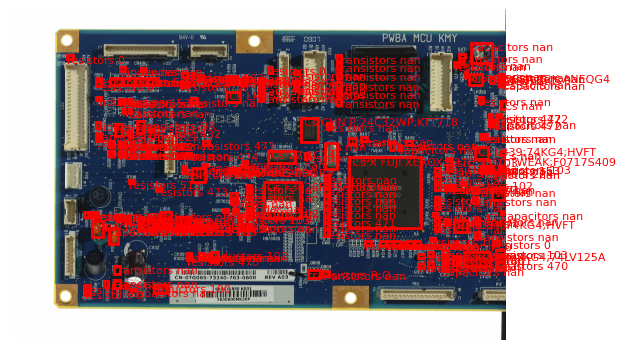

In [ ]:
image = images[0]
labels = pd.read_csv(os.path.join(DATA_DIR, image.replace('.tif', '.csv')))
image = plt.imread(os.path.join(DATA_DIR, image))

plt.imshow(image)
plt.axis('off')

for i, row in labels.iterrows():
    bounding_box = json.loads(row['component_location'])
    if isinstance(bounding_box, str):
        bounding_box = json.loads(bounding_box)
    assert bounding_box['name'] == 'rect'
    x = bounding_box['x']
    y = bounding_box['y']
    width = bounding_box['width']
    height = bounding_box['height']

    component_type = row['component_type']
    text_on_component = row['text_on_component']

    plt.gca().add_patch(plt.Rectangle((x, y), width, height, fill=False, edgecolor='red', linewidth=2)) # type: ignore
    plt.text(x, y, f'{component_type} {text_on_component}', color='red', fontsize=8, ha='left', va='top')

plt.show()

Settings -> Mode=base, Device=mps:0, Torchscript=disabled


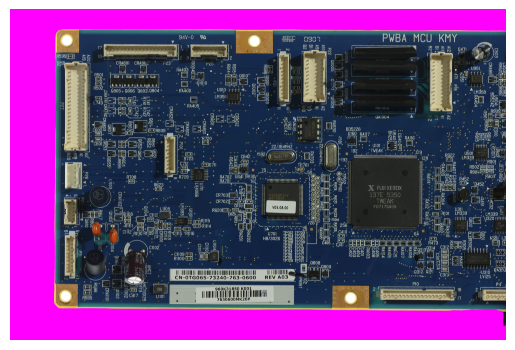

In [12]:
remover = Remover()
out = remover.process(image, threshold=0.9)

# set transparent background to magenta
out[out[:, :, 3] == 0] = [255, 0, 255, 255]

plt.imshow(out)
plt.axis('off')
plt.show()

In [ ]:
if not os.path.exists(MANUAL_INSPECTION_DIR):
    os.makedirs(MANUAL_INSPECTION_DIR)
for image_path in images:
    if os.path.exists(os.path.join(PROCESSED_DIR, image_path.replace('.tif', '.png'))):
        continue
        
    image = plt.imread(os.path.join(DATA_DIR, image_path))
    transparent_image = remover.process(image, threshold=0.9)
    plt.imsave(os.path.join(MANUAL_INSPECTION_DIR, image_path.replace('.tif', '.png')), transparent_image) # type: ignore
    plt.imsave(os.path.join(MANUAL_INSPECTION_DIR, image_path.replace('.tif', '_bg.png')), image) # type: ignore